In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#load the datasets into pandas dataframe
df = pd.read_csv(r'superstore.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         10014 non-null  int64  
 1   Order ID       10014 non-null  object 
 2   Order Date     10014 non-null  object 
 3   Ship Date      10014 non-null  object 
 4   Ship Mode      9916 non-null   object 
 5   Customer ID    10014 non-null  object 
 6   Customer Name  10014 non-null  object 
 7   Segment        10014 non-null  object 
 8   Country        10014 non-null  object 
 9   City           10014 non-null  object 
 10  State          10014 non-null  object 
 11  Postal Code    10014 non-null  int64  
 12  Region         10014 non-null  object 
 13  Product ID     10014 non-null  object 
 14  Category       10014 non-null  object 
 15  Sub-Category   10014 non-null  object 
 16  Product Name   10014 non-null  object 
 17  Sales Price    10014 non-null  float64
 18  Quanti

In [5]:
#handling duplicates
# Shows all rows that are duplicates of each other (including the first)
df[df.duplicated(subset = 'Row ID', keep = False)].sort_values(by = 'Row ID')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
17,18,CA-2014-167164,13/05/14,2014-5-15,Second Class,AG-10270,Alejandro Grove,Consumer,United States,West Jordan,...,84084,West,OFF-ST-10000107,Office Supplies,Storage,Fellowes Super Stor/Drawer,55.500,2.0,0.0,9.9900
9996,18,CA-2014-167164,13/05/14,2014-5-15,Second Class,AG-10270,Alejandro Grove,Consumer,United States,West Jordan,...,84084,West,OFF-ST-10000107,Office Supplies,Storage,Fellowes Super Stor/Drawer,55.500,2.0,0.0,9.9900
18,19,CA-2014-143336,27/08/14,2014-9-1,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.560,2.0,0.0,2.4824
9997,19,CA-2014-143336,27/08/14,2014-9-1,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.560,2.0,0.0,2.4824
19,20,CA-2014-143336,27/08/14,2014-9-1,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,NaN,0.2,16.0110
9998,20,CA-2014-143336,27/08/14,2014-9-1,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3.0,0.2,16.0110
20,21,CA-2014-143336,27/08/14,2014-9-1,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.720,4.0,0.2,7.3840
9999,21,CA-2014-143336,27/08/14,2014-9-1,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.720,4.0,0.2,7.3840
1042,1043,CA-2016-102981,06/09/16,09/09/16,Second Class,MO-17500,Mary O'Rourke,Consumer,United States,New York City,...,10035,East,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",722.352,3.0,0.2,90.2940
10004,1043,CA-2016-102981,06/09/16,09/09/16,Second Class,MO-17500,Mary O'Rourke,Consumer,United States,New York City,...,10035,East,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",722.352,3.0,0.2,90.2940


In [6]:
#In analysis we found that some Sales Price values were negative,and profit were positive, Fix them (assuming the minus is a mistake)
df['Sales Price'] = df['Sales Price'].abs()
#Now drop the duplicate rows
df = df.drop_duplicates()

In [7]:
#we ensure there is no duplicate row_id
(df.groupby(['Row ID']).size()>1).sum() == 0

False

In [8]:
#we ensure there is no two duplicate rows
df.duplicated().sum()

0

In [9]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,12/06/16,16/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,9991,CA-2017-121258,26/02/17,03/03/17,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.0,0.00,15.6332
9991,9992,CA-2017-121258,26/02/17,03/03/17,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2.0,0.20,19.3932
9992,9993,CA-2017-121258,26/02/17,03/03/17,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4.0,0.00,13.3200
9993,9994,CA-2017-119914,04/05/17,09/05/17,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.1600,2.0,0.00,72.9480


In [10]:
#number of distinct rows
df.drop_duplicates().shape[0]
#number of distinct orders ids
df['Order ID'].nunique()

9995

5009

In [11]:
#covert both columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'],errors = 'coerce', dayfirst = True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'],errors = 'coerce', dayfirst = True)

In [12]:
df['OrderID_Year'] = df['Order ID'].str[3:7].astype(int)
print('mismathces :', (df['Order Date'].dt.year != df['Order ID'].str[3:7].astype(int)).sum())
#There were 40 records where order id: year and order date: year is not matching

mismathces : 40


In [13]:
mismatches_record = df[df['Order Date'].dt.year != df['Order ID'].str[3:7].astype(int)]
mismatches_record[['Order ID','Order Date','Ship Date']]
print('number of mismatched distinct order id:',mismatches_record['Order ID'].nunique())

,Order ID,Order Date,Ship Date
62,CA-2015-135545,2017-11-24,2015-11-30
63,CA-2015-135545,2017-11-24,2015-11-30
64,CA-2015-135545,2017-11-24,2015-11-30
65,CA-2015-135545,2017-11-24,2015-11-30
943,CA-2015-120880,2013-05-29,2015-06-03
944,CA-2015-120880,2013-05-29,2015-06-03
945,CA-2015-120880,2013-05-29,2015-06-03
1152,CA-2017-160395,2016-12-31,2017-01-06
1153,CA-2017-160395,2016-12-31,2017-01-06
2752,CA-2015-155306,1999-04-17,2015-04-21


number of mismatched distinct order id: 16


In [14]:
diff = (df['Ship Date'] - df['Order Date']).dt.days.abs()
df[diff>30]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,OrderID_Year
62,63,CA-2015-135545,2017-11-24,2015-11-30,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,...,West,TEC-AC-10004633,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,13.980,2.0,0.0,6.1512,2015
63,64,CA-2015-135545,2017-11-24,2015-11-30,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,...,West,OFF-BI-10001078,Office Supplies,Binders,"Acco PRESSTEX Data Binder with Storage Hooks, ...",25.824,6.0,0.2,9.3612,2015
64,65,CA-2015-135545,2017-11-24,2015-11-30,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,...,West,OFF-PA-10003892,Office Supplies,Paper,Xerox 1943,146.730,3.0,0.0,68.9631,2015
65,66,CA-2015-135545,2017-11-24,2015-11-30,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,...,West,FUR-FU-10000397,Furniture,Furnishings,Luxo Economy Swing Arm Lamp,79.760,4.0,0.0,22.3328,2015
943,944,CA-2015-120880,2013-05-29,2015-06-03,Standard Class,JL-15850,John Lucas,Consumer,United States,Seattle,...,West,OFF-PA-10004101,Office Supplies,Paper,Xerox 1894,32.400,5.0,0.0,15.5520,2015
944,945,CA-2015-120880,2013-05-29,2015-06-03,Standard Class,JL-15850,John Lucas,Consumer,United States,Seattle,...,West,OFF-ST-10001496,Office Supplies,Storage,Standard Rollaway File with Lock,540.570,3.0,0.0,140.5482,2015
945,946,CA-2015-120880,2013-05-29,2015-06-03,Standard Class,JL-15850,John Lucas,Consumer,United States,Seattle,...,West,OFF-BI-10002931,Office Supplies,Binders,"Avery Trapezoid Extra Heavy Duty 4"" Binders",167.760,5.0,0.2,62.9100,2015
2752,2753,CA-2015-155306,1999-04-17,2015-04-21,Standard Class,GA-14515,George Ashbrook,Consumer,United States,San Francisco,...,West,OFF-AR-10003251,Office Supplies,Art,Prang Drawing Pencil Set,5.560,2.0,0.0,2.2240,2015
2753,2754,CA-2015-155306,1999-04-17,2015-04-21,Standard Class,GA-14515,George Ashbrook,Consumer,United States,San Francisco,...,West,TEC-AC-10003174,Technology,Accessories,Plantronics S12 Corded Telephone Headset System,323.370,3.0,0.0,129.3480,2015
2754,2755,CA-2015-155306,1999-04-17,2015-04-21,Standard Class,GA-14515,George Ashbrook,Consumer,United States,San Francisco,...,West,TEC-PH-10002310,Technology,Phones,Plantronics Calisto P620-M USB Wireless Speake...,783.960,5.0,0.2,68.5965,2015


In [15]:
df['Order Date'] = np.where(diff>30,pd.to_datetime({'year': df['OrderID_Year'],
                                                    'month':df['Order Date'].dt.month,
                                                    'day':df['Order Date'].dt.day}, errors = 'coerce'),df['Order Date'])

In [16]:
print('mismathces :', (df['Order Date'].dt.year != df['Order ID'].str[3:7].astype(int)).sum())

mismathces : 7


In [17]:
df[df['Order Date'].dt.year != df['Order ID'].str[3:7].astype(int)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,OrderID_Year
1152,1153,CA-2017-160395,2016-12-31,2017-01-06,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,...,West,OFF-AR-10003759,Office Supplies,Art,"Crayola Anti Dust Chalk, 12/Pack",3.640,2.0,0.0,1.6380,2017
1153,1154,CA-2017-160395,2016-12-31,2017-01-06,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,...,West,OFF-BI-10003984,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',159.768,7.0,0.2,53.9217,2017
2821,2822,CA-2017-100202,2016-12-31,2017-01-05,Standard Class,BD-11620,Brian DeCherney,Consumer,United States,Anaheim,...,West,TEC-PH-10002563,Technology,Phones,Adtran 1202752G1,302.376,3.0,0.2,22.6782,2017
4612,4613,US-2017-165953,2016-12-31,2017-01-06,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,...,South,OFF-AR-10000588,Office Supplies,Art,Newell 345,47.616,3.0,0.2,3.5712,2017
4613,4614,US-2017-165953,2016-12-31,2017-01-06,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,...,South,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,23.480,5.0,0.2,8.2180,2017
5738,5739,CA-2017-156139,2016-12-31,2017-01-06,Standard Class,BP-11155,Becky Pak,Consumer,United States,San Francisco,...,West,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",38.376,3.0,0.2,13.4316,2017
6341,6342,US-2017-105830,2016-12-31,2017-01-02,First Class,DB-13660,Duane Benoit,Consumer,United States,Lancaster,...,East,OFF-ST-10002554,Office Supplies,Storage,Tennsco Industrial Shelving,156.512,4.0,0.2,-35.2152,2017


In [18]:
df['Ship Mode'].isnull().sum()

98

In [19]:
df['Day to Ship'] = (df['Ship Date'] - df['Order Date']).dt.days

In [20]:
df['Ship Mode'] = np.where(df['Day to Ship']==0,'Same Day',np.where(df['Day to Ship']==7,'Standard Class',df['Ship Mode']))

In [21]:
df['Ship Mode'].isnull().sum()

0

In [22]:
#Number of Null values in Quantity Column
df['Quantity'].isnull().sum()

18

In [23]:
#for imputing the missing values
#Mean Imputation : When data is normally distributed (symmetric, few outliers)
#Median Imputation : When data is skewed or has outliers
#Mode Imputation : When data has many repeated values (for low cardinality columns)
#Group-wise Median/Mean : When quantity depends on categories (like product or sub-category)
#Model-based : When advanced prediction is justified (ML-based imputers)
df['Quantity'].describe()
#Quantity is discrete and positively skewed (mean > median).
#Max value 14 is noticeably higher than the median 3, suggesting outliers.
#The interquartile range is narrow (Q1 = 2, Q3 = 5), again showing skew
#Median = 3 is a better central tendency measure than mean (3.79) in skewed data.
#Median is less sensitive to outliers (e.g., large bulk orders).
#Quantity is not a continuous variable — it's discrete integers, so imputing with the mean can produce float values, which is not ideal.
df['Quantity'].fillna(df['Quantity'].median(),inplace = True)

count    9977.000000
mean        3.790919
std         2.226766
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

In [24]:
#After Impution , there is no null values remaining in the quantity column
df['Quantity'].isnull().sum()

0

In [25]:
#once more check for duplicated values
df[df.duplicated(keep = False)]
df = df.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,OrderID_Year,Day to Ship
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.48,3.0,0.2,16.011,2014,5
9998,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.48,3.0,0.2,16.011,2014,5


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [27]:
#String Manipulation
df['Customer Name']
#if you want to extract the first name
df['Customer Name'].apply(lambda name : name.split(' ')[0])
df['Customer Name'].str.split(' ').str[0]
#if you want to extract the last name
df['Customer Name'].apply(lambda name : name.split(' ')[-1])
df['Customer Name'].str.split(' ').str[-1]
#if you want to extract the middle name
df['Customer Name'].str.split(' ').str[1:-1]
df['Customer Name'].apply(lambda name : name.split(' ')[1:-1])
df['Customer Name'].apply(lambda name: ' '.join(name.split()[1:-1]) if len(name.split()) > 2 else '')

0            Claire Gute
1            Claire Gute
2        Darrin Van Huff
3         Sean O'Donnell
4         Sean O'Donnell
              ...       
9989    Tom Boeckenhauer
9990         Dave Brooks
9991         Dave Brooks
9992         Dave Brooks
9993        Chris Cortes
Name: Customer Name, Length: 9994, dtype: object

0       Claire
1       Claire
2       Darrin
3         Sean
4         Sean
         ...  
9989       Tom
9990      Dave
9991      Dave
9992      Dave
9993     Chris
Name: Customer Name, Length: 9994, dtype: object

0       Claire
1       Claire
2       Darrin
3         Sean
4         Sean
         ...  
9989       Tom
9990      Dave
9991      Dave
9992      Dave
9993     Chris
Name: Customer Name, Length: 9994, dtype: object

0               Gute
1               Gute
2               Huff
3          O'Donnell
4          O'Donnell
            ...     
9989    Boeckenhauer
9990          Brooks
9991          Brooks
9992          Brooks
9993          Cortes
Name: Customer Name, Length: 9994, dtype: object

0               Gute
1               Gute
2               Huff
3          O'Donnell
4          O'Donnell
            ...     
9989    Boeckenhauer
9990          Brooks
9991          Brooks
9992          Brooks
9993          Cortes
Name: Customer Name, Length: 9994, dtype: object

0          []
1          []
2       [Van]
3          []
4          []
        ...  
9989       []
9990       []
9991       []
9992       []
9993       []
Name: Customer Name, Length: 9994, dtype: object

0          []
1          []
2       [Van]
3          []
4          []
        ...  
9989       []
9990       []
9991       []
9992       []
9993       []
Name: Customer Name, Length: 9994, dtype: object

0          
1          
2       Van
3          
4          
       ... 
9989       
9990       
9991       
9992       
9993       
Name: Customer Name, Length: 9994, dtype: object

In [28]:
#Data Masking 
df['Customer Name Masked'] = df['Customer Name'].apply(lambda name : ''.join([part[0].upper() for part in name.split(' ')]))

C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_20556\3163504536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer Name Masked'] = df['Customer Name'].apply(lambda name : ''.join([part[0].upper() for part in name.split(' ')]))


In [29]:
#Masking or dropping sensitive data like customer name is crucial step in this process
df.drop(columns = ['Customer Name'])

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,OrderID_Year,Day to Ship,Customer Name Masked
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,2016,3,CG
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,2016,3,CG
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,2016,4,DVH
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015,7,SO
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,2015,7,SO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3.0,0.20,4.1028,2014,2,TB
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.0,0.00,15.6332,2017,5,DB
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,...,Technology,Phones,Aastra 57i VoIP phone,258.5760,2.0,0.20,19.3932,2017,5,DB
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4.0,0.00,13.3200,2017,5,DB


In [30]:
#Convert the Postal Code column from numeric to text format, ensuring all codes are 5 characters long. 
#Add a leading 'O' where necessary
df['Postal Code'] = df['Postal Code'].astype(str).apply(lambda x : 'O' + x.zfill(5))

C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_20556\4068704724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal Code'] = df['Postal Code'].astype(str).apply(lambda x : 'O' + x.zfill(5))


In [31]:
#Data Type Conversion
df['Quantity'].dtype
df['Sales Price'].dtype
#lets make the quantity to int
df['Quantity'] = df['Quantity'].astype(int)
#lets check
df['Quantity'].dtype
df['Sales Price'].dtype

dtype('float64')

dtype('float64')

C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_20556\2840636041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = df['Quantity'].astype(int)


dtype('int32')

dtype('float64')

In [32]:
#Handling Inconsistent Categorical Data
df['Order ID'].str[:2].value_counts()

CA    8308
US    1686
Name: Order ID, dtype: int64

In [33]:
#state is present in full abbreviations
#Lets suppose a senerio if we have to replace the full form with short form
#state_full_to_abbrev = {
#    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
#    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
#    'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI',
#    'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
#    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME',
#    'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
#    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
#    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
#    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
#    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
#    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
#    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
#    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
#       }
# df['State'] = df['State'].replace(state_full_to_abbrev)


In [34]:
# Feature Engineering
df['Original Price'] = df['Sales Price'] /(1- df['Discount'])
df['Total Sales'] = df['Sales Price'] * df['Quantity']
df['Total Profit'] = df['Profit'] * df['Quantity']
df['Discount Price'] = df['Original Price'] - df['Sales Price']
df['Total Discount'] = df['Discount Price'] * df['Quantity']


C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_20556\1383369445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Original Price'] = df['Sales Price'] /(1- df['Discount'])
C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_20556\1383369445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Sales'] = df['Sales Price'] * df['Quantity']
C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_20556\1383369445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [35]:
#feature enginnering
df['Shipping Urgency'] = np.where(df['Day to Ship']==0,'Immediate',np.where((df['Day to Ship']>=1) & (df['Day to Ship']<=3) ,'Urgent','Standard'))
df

C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_20556\2441597664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Shipping Urgency'] = np.where(df['Day to Ship']==0,'Immediate',np.where((df['Day to Ship']>=1) & (df['Day to Ship']<=3) ,'Urgent','Standard'))


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Profit,OrderID_Year,Day to Ship,Customer Name Masked,Original Price,Total Sales,Total Profit,Discount Price,Total Discount,Shipping Urgency
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,41.9136,2016,3,CG,261.96,523.9200,83.8272,0.0000,0.0000,Urgent
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,219.5820,2016,3,CG,731.94,2195.8200,658.7460,0.0000,0.0000,Urgent
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,6.8714,2016,4,DVH,14.62,29.2400,13.7428,0.0000,0.0000,Standard
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,-383.0310,2015,7,SO,1741.05,4787.8875,-1915.1550,783.4725,3917.3625,Standard
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2.5164,2015,7,SO,27.96,44.7360,5.0328,5.5920,11.1840,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,4.1028,2014,2,TB,31.56,75.7440,12.3084,6.3120,18.9360,Urgent
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,15.6332,2017,5,DB,91.96,183.9200,31.2664,0.0000,0.0000,Standard
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,19.3932,2017,5,DB,323.22,517.1520,38.7864,64.6440,129.2880,Standard
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,13.3200,2017,5,DB,29.60,118.4000,53.2800,0.0000,0.0000,Standard


In [36]:
#feature enginnering
#Create a column that calculates days since last order.

df = df.sort_values(by = ['Customer ID','Order Date'])
df['Days Since Last Order'] = df.groupby('Customer ID')['Order Date'].diff().dt.days

In [37]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,OrderID_Year,Day to Ship,Customer Name Masked,Original Price,Total Sales,Total Profit,Discount Price,Total Discount,Shipping Urgency,Days Since Last Order
2229,2230,CA-2014-128055,2014-03-31,2014-04-05,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,2014,5,AA,841.96,1347.136,505.1760,168.392,336.784,Standard,NaN
2230,2231,CA-2014-128055,2014-03-31,2014-04-05,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,2014,5,AA,52.98,105.960,29.6688,0.000,0.000,Standard,0.0
7468,7469,CA-2014-138100,2014-09-15,2014-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,2014,5,AA,14.94,44.820,21.0654,0.000,0.000,Standard,168.0
7469,7470,CA-2014-138100,2014-09-15,2014-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,2014,5,AA,14.56,29.120,12.5216,0.000,0.000,Standard,0.0
1299,1300,CA-2015-121391,2015-10-04,2015-10-07,First Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,2015,3,AA,26.96,53.920,14.0192,0.000,0.000,Urgent,384.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,5899,CA-2016-167682,2016-04-03,2016-04-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Richmond,...,2016,6,ZD,259.96,1039.840,499.1232,0.000,0.000,Standard,0.0
3040,3041,US-2016-147991,2016-05-05,2016-05-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Chattanooga,...,2016,4,ZD,20.90,83.600,16.7200,4.180,20.900,Standard,32.0
3814,3815,CA-2016-152471,2016-07-08,2016-07-08,Same Day,ZD-21925,Zuschuss Donatelli,Consumer,United States,Jacksonville,...,2016,0,ZD,1029.95,4119.800,257.4875,205.990,1029.950,Immediate,64.0
3815,3816,CA-2016-152471,2016-07-08,2016-07-08,Same Day,ZD-21925,Zuschuss Donatelli,Consumer,United States,Jacksonville,...,2016,0,ZD,19.98,31.968,9.9900,3.996,7.992,Immediate,0.0


In [38]:
#Feature Engineering
#Create a new dataset which stores the total sales, quantity and discount per customer 
#and then merge these back to the original dataset.

customer_agg = df.groupby('Customer ID').agg(Total_sales_per_cust = ('Total Sales','sum'),
                                             Total_quantity_per_cust = ('Quantity','sum'),
                                             Total_discount_per_cust =('Total Discount','sum'))
customer_agg
df = df.merge(customer_agg, on = 'Customer ID', how = 'left')


,Total_sales_per_cust,Total_quantity_per_cust,Total_discount_per_cust
Customer ID,,,
AA-10315,16073.344,30,3681.906
AA-10375,2734.830,41,188.540
AA-10480,5493.936,36,11.664
AA-10645,22927.855,64,3342.735
AB-10015,1984.480,13,18.490
...,...,...,...
XP-21865,8676.214,100,908.116
YC-21895,27208.926,31,1106.694
YS-21880,46478.992,58,6947.658


In [39]:
#handling outliers
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_boundry = q1-1.5*IQR
    upper_boundry = q3+1.5*IQR
    lower_boundry,upper_boundry
    df_removed_outlier = df[(df[column]>=lower_boundry) & (df[column]<=upper_boundry)]
    return df_removed_outlier

In [40]:
df_cleaned = remove_outliers(df, 'Sales Price')
df_cleaned

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Original Price,Total Sales,Total Profit,Discount Price,Total Discount,Shipping Urgency,Days Since Last Order,Total_sales_per_cust,Total_quantity_per_cust,Total_discount_per_cust
1,2231,CA-2014-128055,2014-03-31,2014-04-05,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,52.98,105.960,29.6688,0.000,0.000,Standard,0.0,16073.344,30,3681.906
2,7469,CA-2014-138100,2014-09-15,2014-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,14.94,44.820,21.0654,0.000,0.000,Standard,168.0,16073.344,30,3681.906
3,7470,CA-2014-138100,2014-09-15,2014-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,14.56,29.120,12.5216,0.000,0.000,Standard,0.0,16073.344,30,3681.906
4,1300,CA-2015-121391,2015-10-04,2015-10-07,First Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,26.96,53.920,14.0192,0.000,0.000,Urgent,384.0,16073.344,30,3681.906
6,5200,CA-2016-103982,2016-03-03,2016-03-08,Standard Class,AA-10315,Alex Avila,Consumer,United States,Round Rock,...,2.88,2.304,0.7776,0.576,0.576,Standard,0.0,16073.344,30,3681.906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,5898,CA-2016-167682,2016-04-03,2016-04-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Richmond,...,71.12,284.480,88.1888,0.000,0.000,Standard,585.0,6492.448,32,1241.672
9989,5899,CA-2016-167682,2016-04-03,2016-04-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Richmond,...,259.96,1039.840,499.1232,0.000,0.000,Standard,0.0,6492.448,32,1241.672
9990,3041,US-2016-147991,2016-05-05,2016-05-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Chattanooga,...,20.90,83.600,16.7200,4.180,20.900,Standard,32.0,6492.448,32,1241.672
9992,3816,CA-2016-152471,2016-07-08,2016-07-08,Same Day,ZD-21925,Zuschuss Donatelli,Consumer,United States,Jacksonville,...,19.98,31.968,9.9900,3.996,7.992,Immediate,0.0,6492.448,32,1241.672


In [41]:
#A quintile is a statistical method used to divide a dataset into five equal parts, each representing 20% of the data.
#Each part is called a quintile:
#Q1 (1st Quintile): Bottom 20% of the data
#Q2 (2nd Quintile): Next 20%
#Q3 (3rd Quintile): Middle 20%
#Q4 (4th Quintile): Next-to-top 20%
#Q5 (5th Quintile): Top 20% of the data

customer_summary = df_cleaned.groupby('Customer ID').agg(Total_sales_per_cust = ('Total Sales','sum'),
                                                         Total_profit_per_cust = ('Total Profit', 'sum')).reset_index()
customer_summary

,Customer ID,Total_sales_per_cust,Total_profit_per_cust
0,AA-10315,2935.992,499.1477
1,AA-10375,1734.870,453.0894
2,AA-10480,5493.936,1414.5166
3,AA-10645,3477.920,806.3019
4,AB-10015,1984.480,262.7361
...,...,...,...
785,XP-21865,8676.214,2102.8354
786,YC-21895,1567.328,347.8780
787,YS-21880,7336.960,943.3772
788,ZC-21910,9799.275,1212.0919


In [42]:
customer_summary['Sales Quintile'] = pd.qcut(customer_summary['Total_sales_per_cust'],5,labels = ['Q1','Q2','Q3','Q4','Q5'])
customer_summary['Profit Quintile'] = pd.qcut(customer_summary['Total_profit_per_cust'],5,labels = ['Q1','Q2','Q3','Q4','Q5'])

In [43]:
df_cleaned = df_cleaned.merge(customer_summary[['Customer ID','Sales Quintile','Profit Quintile']], on = 'Customer ID', how = 'left')

In [44]:
df_cleaned

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Total Profit,Discount Price,Total Discount,Shipping Urgency,Days Since Last Order,Total_sales_per_cust,Total_quantity_per_cust,Total_discount_per_cust,Sales Quintile,Profit Quintile
0,2231,CA-2014-128055,2014-03-31,2014-04-05,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,29.6688,0.000,0.000,Standard,0.0,16073.344,30,3681.906,Q2,Q3
1,7469,CA-2014-138100,2014-09-15,2014-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,21.0654,0.000,0.000,Standard,168.0,16073.344,30,3681.906,Q2,Q3
2,7470,CA-2014-138100,2014-09-15,2014-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,12.5216,0.000,0.000,Standard,0.0,16073.344,30,3681.906,Q2,Q3
3,1300,CA-2015-121391,2015-10-04,2015-10-07,First Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,14.0192,0.000,0.000,Urgent,384.0,16073.344,30,3681.906,Q2,Q3
4,5200,CA-2016-103982,2016-03-03,2016-03-08,Standard Class,AA-10315,Alex Avila,Consumer,United States,Round Rock,...,0.7776,0.576,0.576,Standard,0.0,16073.344,30,3681.906,Q2,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8822,5898,CA-2016-167682,2016-04-03,2016-04-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Richmond,...,88.1888,0.000,0.000,Standard,585.0,6492.448,32,1241.672,Q2,Q4
8823,5899,CA-2016-167682,2016-04-03,2016-04-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Richmond,...,499.1232,0.000,0.000,Standard,0.0,6492.448,32,1241.672,Q2,Q4
8824,3041,US-2016-147991,2016-05-05,2016-05-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Chattanooga,...,16.7200,4.180,20.900,Standard,32.0,6492.448,32,1241.672,Q2,Q4
8825,3816,CA-2016-152471,2016-07-08,2016-07-08,Same Day,ZD-21925,Zuschuss Donatelli,Consumer,United States,Jacksonville,...,9.9900,3.996,7.992,Immediate,0.0,6492.448,32,1241.672,Q2,Q4


In [45]:
#cross tab / contingency table
crossgrid = pd.crosstab(customer_summary['Sales Quintile'],customer_summary['Profit Quintile'])
print(crossgrid)
#Top Customers (Q5 Sales + Q5 Profit):
##89 customers are in both Q5 for Sales and Profit — these are your most valuable customers!
#High Sales but Low Profit (e.g., Q5 Sales + Q1/Q2 Profit):
##27 (Q1) + 8 (Q2) customers fall in this. They spend a lot but don’t generate high profits — maybe they get big discounts?
#Low Sales but High Profit (Q1 Sales + Q5 Profit):
##0 customers — meaning no one is spending little but giving you a lot of profit, which is common.

Profit Quintile  Q1  Q2  Q3  Q4  Q5
Sales Quintile                     
Q1               40  83  35   0   0
Q2               26  35  63  34   0
Q3               37  19  33  54  15
Q4               28  13  19  44  54
Q5               27   8   8  26  89


In [58]:
df_cleaned.to_clipboard()

,Product ID,Total Profit
988,OFF-PA-10000100,5415.1889
1112,OFF-PA-10001970,5332.3648
1012,OFF-PA-10000357,4612.5774
1034,OFF-PA-10000675,4024.3982
958,OFF-LA-10003510,3940.2018
1456,TEC-AC-10001432,3679.3020
650,OFF-BI-10001071,3523.3786
965,OFF-LA-10003930,3484.1064
1177,OFF-PA-10003228,3379.1919
636,OFF-BI-10000632,3296.5554


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Product ID', ylabel='Total Profit'>

Text(0.5, 1.0, 'Top 10 Most Profitable Products')

Text(0.5, 0, 'Product ID')

Text(0, 0.5, 'Total Profit')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OFF-PA-10000100'),
  Text(1, 0, 'OFF-PA-10001970'),
  Text(2, 0, 'OFF-PA-10000357'),
  Text(3, 0, 'OFF-PA-10000675'),
  Text(4, 0, 'OFF-LA-10003510'),
  Text(5, 0, 'TEC-AC-10001432'),
  Text(6, 0, 'OFF-BI-10001071'),
  Text(7, 0, 'OFF-LA-10003930'),
  Text(8, 0, 'OFF-PA-10003228'),
  Text(9, 0, 'OFF-BI-10000632')])

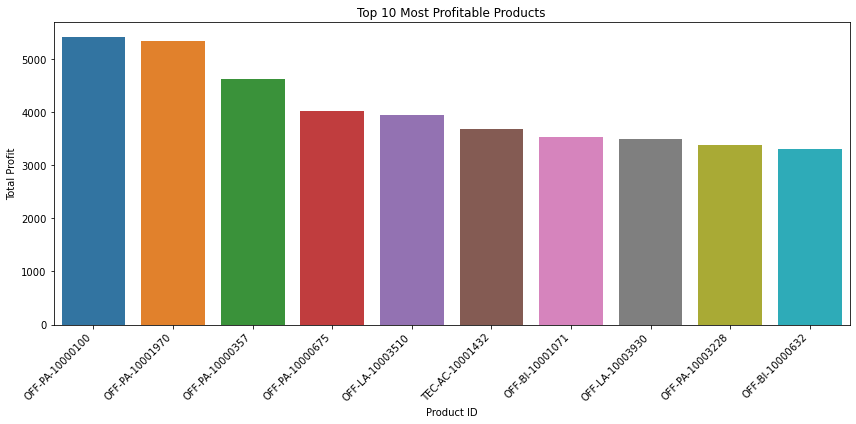

In [46]:
#Sales and Profit Analysis:
#Top 10 Most Profitable Products
Total_profit_per_product = df_cleaned.groupby('Product ID').agg({'Total Profit':'sum'}).reset_index()
Total_profit_per_product = Total_profit_per_product.sort_values(by = 'Total Profit', ascending = False).head(10)
Total_profit_per_product
plt.figure(figsize = (12,6))
sns.barplot(data = Total_profit_per_product ,x = 'Product ID', y = 'Total Profit')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product ID')
plt.ylabel('Total Profit')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

plt.show()

,Product ID,Total Profit
411,OFF-AP-10002651,-9450.2592
798,OFF-BI-10004584,-6919.9620
800,OFF-BI-10004632,-5817.4235
409,OFF-AP-10002534,-5362.0840
14,FUR-BO-10001972,-5141.6500
40,FUR-BO-10004467,-4106.5893
1570,TEC-MA-10001148,-3467.0916
260,FUR-FU-10003806,-3102.8800
250,FUR-FU-10003601,-3001.1642
330,FUR-TA-10002607,-2937.6816


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Product ID', ylabel='Total Profit'>

Text(0.5, 1.0, 'Top 10 Most Loss-Making Products')

Text(0.5, 0, 'Product ID')

Text(0, 0.5, 'Total Loss')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OFF-AP-10002651'),
  Text(1, 0, 'OFF-BI-10004584'),
  Text(2, 0, 'OFF-BI-10004632'),
  Text(3, 0, 'OFF-AP-10002534'),
  Text(4, 0, 'FUR-BO-10001972'),
  Text(5, 0, 'FUR-BO-10004467'),
  Text(6, 0, 'TEC-MA-10001148'),
  Text(7, 0, 'FUR-FU-10003806'),
  Text(8, 0, 'FUR-FU-10003601'),
  Text(9, 0, 'FUR-TA-10002607')])

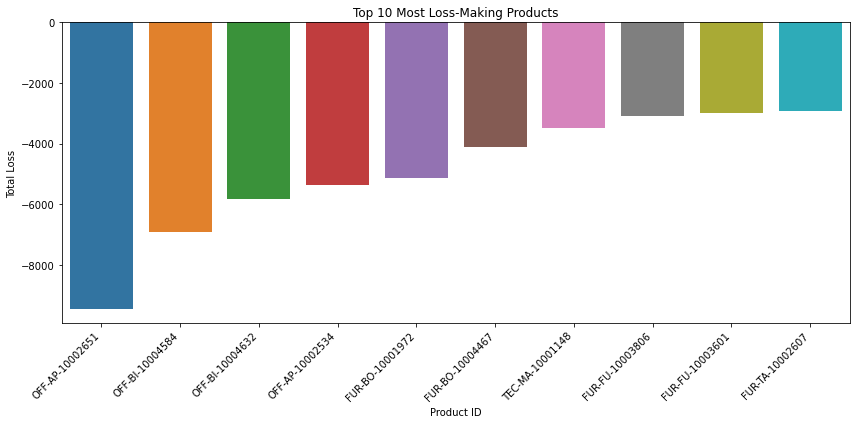

In [47]:
#Top 10 Most Loss-Making Products:
Total_loss_per_product = df_cleaned.groupby('Product ID').agg({'Total Profit':'sum'}).reset_index()
Total_loss_per_product = Total_loss_per_product.sort_values(by = 'Total Profit', ascending = True).head(10)
Total_loss_per_product
plt.figure(figsize = (12,6))
sns.barplot(data = Total_loss_per_product, x = 'Product ID', y = 'Total Profit')
plt.title('Top 10 Most Loss-Making Products')
plt.xlabel('Product ID')
plt.ylabel('Total Loss')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Total Sales', ylabel='Total Profit'>

Text(0.5, 1.0, 'Correlation between Total Sales and Total Profit')

Text(0.5, 0, 'Total Sales')

Text(0, 0.5, 'Total Profit')

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Total Sales', ylabel='Total Profit'>

Text(0.5, 1.0, 'Correlation between Total Sales and Total Profit')

Text(0.5, 0, 'Total Sales')

Text(0, 0.5, 'Total Profit')

<Figure size 864x432 with 0 Axes>

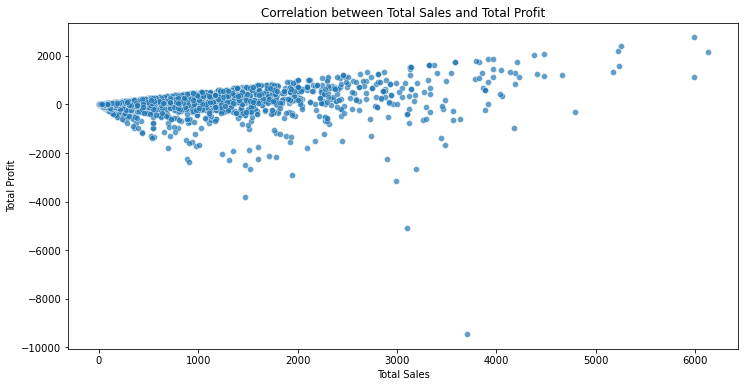

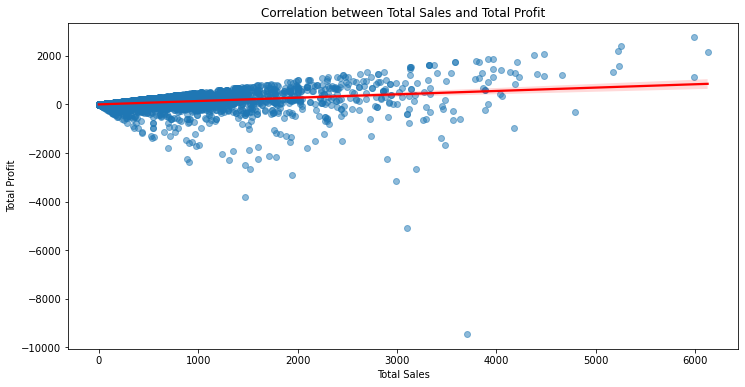

<Figure size 864x432 with 0 Axes>

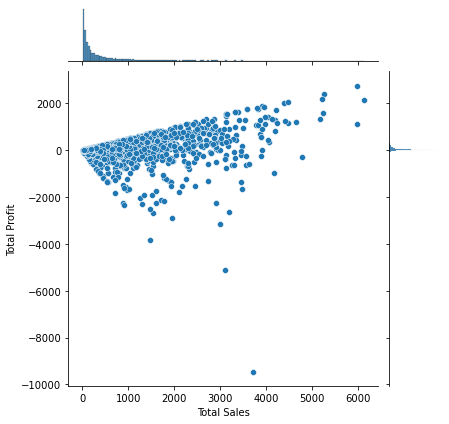

In [48]:
#Sales vs. Profit Correlation
plt.figure(figsize = (12,6))
sns.scatterplot(data = df_cleaned, x = 'Total Sales', y = 'Total Profit',alpha = 0.7)
plt.title('Correlation between Total Sales and Total Profit')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')

plt.figure(figsize = (12,6))
sns.regplot(data = df_cleaned, x = 'Total Sales', y = 'Total Profit',scatter_kws={'alpha':0.5},line_kws={'color':'red'})
plt.title('Correlation between Total Sales and Total Profit')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')

plt.figure(figsize=(12,6))
sns.jointplot(data = df_cleaned, x = 'Total Sales', y = 'Total Profit',kind = 'scatter')


#General upward trend: as Total Sales increases, Total Profit tends to increase too.
#But:There’s high spread (scatter) in Total Profit for similar Sales values.
#Some products with high sales still have low or negative profit → this is important.
#A few outliers at the bottom (high sales but very low profit or even loss).
# Business Insight:More sales don’t always mean more profit. Some items may be sold at heavy discounts or have low margins.
#It's critical to analyze products with high sales but low profit.

#TOP HISTOGRAM — Total Sales Distribution:
#Highly right-skewed distribution (sharp peak near the left, long tail to the right).
#Interpretation:Most of the products/orders have very low Total Sales, while only a few have very high sales.
#Business Insight:A few items may be driving a large part of the revenue — consider focusing on those.
#Pareto principle: 20% items bring 80% revenue

#RIGHT HISTOGRAM — Total Profit Distribution:
#Also Right-Skewed (but more dispersed):
#Many products make little to moderate profit.A few have very high profit, while some have zero or negative profit (loss).
#You can spot some values near or below zero → indicating possible unprofitable sales.
#Business Implication: Not all sales are profitable. Some may be sold at a loss, or incur high costs.
#It’s important to investigate:
#Are these discounts or return-related losses?
#Are high-cost items priced too low?
#Focus on improving the margins of high-sale but low-profit items..

,Customer ID,Total_sales_per_cust,Total_profit_per_cust,Sales Quintile,Profit Quintile
0,AA-10315,2935.992,499.1477,Q2,Q3
1,AA-10375,1734.870,453.0894,Q2,Q3
2,AA-10480,5493.936,1414.5166,Q4,Q5
3,AA-10645,3477.920,806.3019,Q3,Q4
4,AB-10015,1984.480,262.7361,Q2,Q2
...,...,...,...,...,...
785,XP-21865,8676.214,2102.8354,Q5,Q5
786,YC-21895,1567.328,347.8780,Q2,Q3
787,YS-21880,7336.960,943.3772,Q5,Q4
788,ZC-21910,9799.275,1212.0919,Q5,Q5


Profit Quintile,Q1,Q2,Q3,Q4,Q5
Sales Quintile,,,,,
Q1,40,83,35,0,0
Q2,26,35,63,34,0
Q3,37,19,33,54,15
Q4,28,13,19,44,54
Q5,27,8,8,26,89


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Profit Quintile', ylabel='Sales Quintile'>

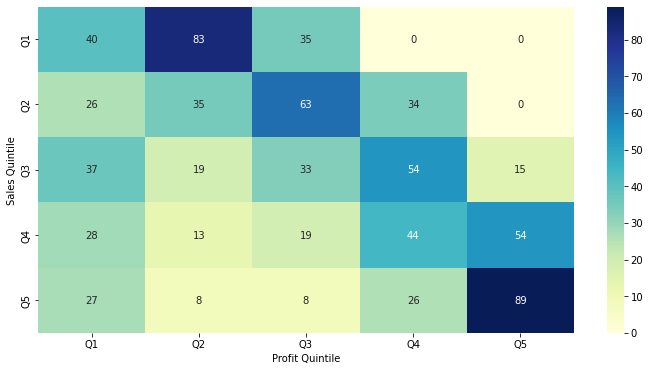

In [49]:
#Customer Segmentation and Analysis:
customer_summary
crossgrid = pd.crosstab(customer_summary['Sales Quintile'],customer_summary['Profit Quintile'])
crossgrid
plt.figure(figsize=(12,6))
sns.heatmap(crossgrid, annot = True, fmt = 'd',cmap = 'YlGnBu')

In [50]:
#Customer Segmentation and Analysis:
pivot_df = df_cleaned.pivot_table(index = 'Category', columns = 'Segment', values = ['Total Sales','Total Profit'], aggfunc = 'sum',
                       margins= True,margins_name = 'Total')
pivot_df
#1. Most Profitable Category + Segment Combination
#  Office Supplies – Consumer Segment 
#          ->Profit: ₹143,168 → Highest profit
#          ->Sales: ₹778,951 → Very high sales

#2.Loss-Making Category
#  Furniture
#          ->Total Profit: ₹−9,930 → Only category with overall loss
#          ->Corporate and Home Office segments are heavily unprofitable
#          ->Even though sales are decent (~₹897,818), margins are likely poor or discounts too high.


Total Profit                                        \
Segment             Consumer    Corporate Home Office        Total   
Category                                                             
Furniture          2582.6253   -6683.3228  -5829.4488   -9930.1463   
Office Supplies  143167.9060   98425.9338  72328.4499  313922.2897   
Technology        77162.8652   35695.0946  26862.7946  139720.7544   
Total            222913.3965  127437.7056  93361.7957  443712.8978   

                  Total Sales                                         
Segment              Consumer   Corporate  Home Office         Total  
Category                                                              
Furniture        4.868905e+05  269927.376  140999.7184  8.978176e+05  
Office Supplies  7.789510e+05  462405.172  298924.5080  1.540281e+06  
Technology       4.746293e+05  240752.380  150763.9440  8.661456e+05  
Total            1.740471e+06  973084.928  590688.1704  3.304244e+06

In [51]:
#Now calculate Conversion Efficiency (Profit % of Sales)

pivot_df['Conversion Efficiency(%)'] = (pivot_df[('Total Profit','Total')]/pivot_df[('Total Sales','Total')]) * 100
pivot_df['Conversion Efficiency(%)'] = pivot_df['Conversion Efficiency(%)'].round(2)
pivot_df

Total Profit                                        \
Segment             Consumer    Corporate Home Office        Total   
Category                                                             
Furniture          2582.6253   -6683.3228  -5829.4488   -9930.1463   
Office Supplies  143167.9060   98425.9338  72328.4499  313922.2897   
Technology        77162.8652   35695.0946  26862.7946  139720.7544   
Total            222913.3965  127437.7056  93361.7957  443712.8978   

                  Total Sales                                         \
Segment              Consumer   Corporate  Home Office         Total   
Category                                                               
Furniture        4.868905e+05  269927.376  140999.7184  8.978176e+05   
Office Supplies  7.789510e+05  462405.172  298924.5080  1.540281e+06   
Technology       4.746293e+05  240752.380  150763.9440  8.661456e+05   
Total            1.740471e+06  973084.928  590688.1704  3.304244e+06   

                Conversion Efficiency(%)  
Segment                                   
Category                                  
Furniture                          -1.11  
Office Supplies                    20.38  
Technology                         16.13  
Total                              13.43

<Figure size 864x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of Shipping Urgency')

Text(0.5, 0, 'Shipping Urgency')

Text(0, 0.5, 'Number of Orders')

<Figure size 864x432 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1ffeaa25850>,
 [Text(-0.9340805567484621, -0.5809419192178192, 'Standard'),
  Text(1.016035784477568, 0.4215107171366503, 'Urgent'),
  Text(0.17866624471086454, 1.0853931882045869, 'Immediate')],
 [Text(-0.5094984854991611, -0.31687741048244683, '67.7%'),
  Text(0.5542013369877643, 0.22991493661999104, '27.1%'),
  Text(0.0974543152968352, 0.5920326481115927, '5.2%')])

Text(0.5, 1.0, 'Distribution of Shipping Urgency')

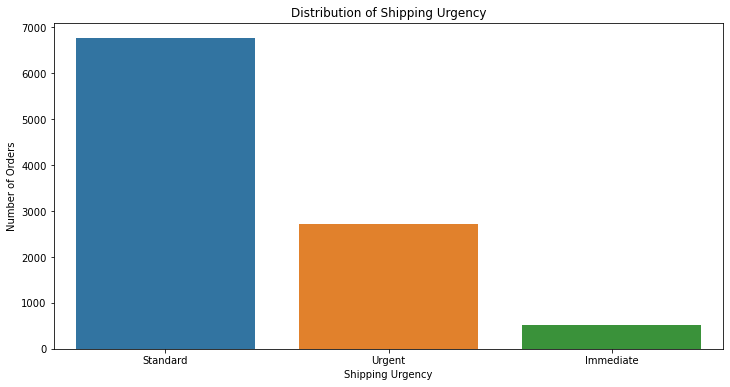

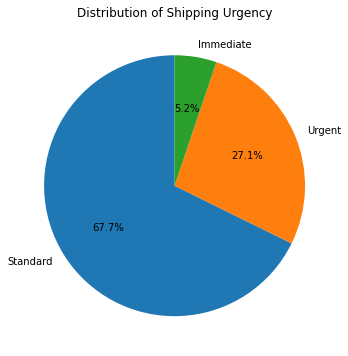

In [52]:
#Shipping and Delivery Analysis:
#Distribution of Shipping Urgency

shipping_urgency_counts = df['Shipping Urgency'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x = shipping_urgency_counts.index, y = shipping_urgency_counts.values)
plt.title('Distribution of Shipping Urgency')
plt.xlabel('Shipping Urgency')
plt.ylabel('Number of Orders')

plt.figure(figsize=(12,6))
plt.pie(shipping_urgency_counts, labels = shipping_urgency_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Shipping Urgency')

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Day to Ship', ylabel='Total Profit'>

Text(0.5, 1.0, 'Days to Ship vs. Profit Distribution')

Text(0.5, 0, 'Days to Ship')

Text(0, 0.5, 'Profit')

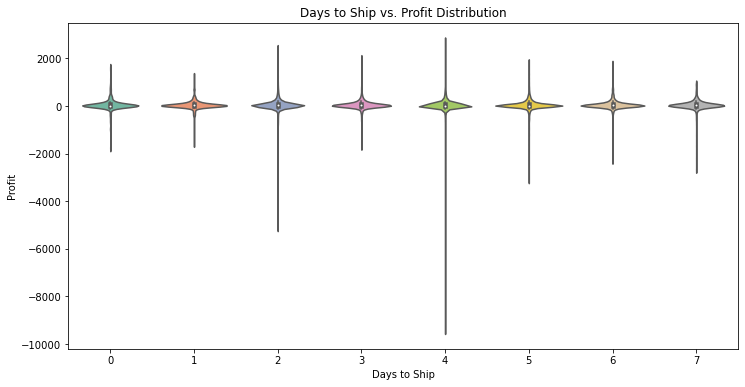

In [53]:
#Days to Ship vs. Profit:
plt.figure(figsize = (12,6))
sns.violinplot(data = df_cleaned, x = 'Day to Ship', y = 'Total Profit', palette='Set2')
plt.title('Days to Ship vs. Profit Distribution')
plt.xlabel('Days to Ship')
plt.ylabel('Profit')

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Ship Mode', ylabel='Total Profit'>

Text(0.5, 1.0, 'Total Profit by Shipping Mode')

Text(0, 0.5, 'Total Profit')

Text(0.5, 0, 'Shipping Mode')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'First Class'),
  Text(1, 0, 'Same Day'),
  Text(2, 0, 'Second Class'),
  Text(3, 0, 'Standard Class')])

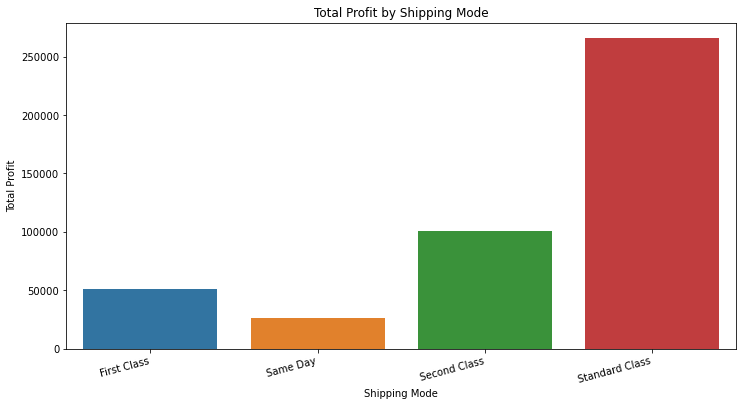

In [54]:
#Shipping Mode and Profitability:
shipmode_profit = df_cleaned.groupby('Ship Mode').agg({'Total Profit':'sum'}).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data = shipmode_profit, x = 'Ship Mode', y = 'Total Profit')
plt.title('Total Profit by Shipping Mode')
plt.ylabel('Total Profit')
plt.xlabel('Shipping Mode')
plt.xticks(rotation=15, ha= 'right')

In [55]:


df_cleaned.pivot_table(index = 'Region', columns = 'Ship Mode', values=['Order ID','Total Profit'], aggfunc = {'Order ID':'count',
                                                                                                               'Total Profit':'sum'},
                      fill_value=0,    margins=True,    margins_name='Total')

Order ID                                            Total Profit  \
Ship Mode First Class Same Day Second Class Standard Class Total  First Class   
Region                                                                          
Central           270      109          412           1275  2066    -543.8864   
East              429      128          470           1487  2514   18232.1612   
South             204       76          279            859  1418   10196.6643   
West              456      164          547           1662  2829   23128.7228   
Total            1359      477         1708           5283  8827   51013.6619   

                                                                
Ship Mode    Same Day Second Class Standard Class        Total  
Region                                                          
Central     1424.2288    7326.5198      -681.4327    7525.4295  
East        4422.6612   25488.4829     85165.3026  133308.6079  
South       8449.2088   22660.7126     56848.8293   98155.4150  
West       11676.5386   45479.5211    124438.6629  204723.4454  
Total      25972.6374  100955.2364    265771.3621  443712.8978

,Region,Total Profit,Total Sales
0,Central,7525.4295,7.346126e+05
1,East,133308.6079,9.141788e+05
2,South,98155.4150,5.213467e+05
3,West,204723.4454,1.134106e+06


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Region', ylabel='Total Sales'>

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Region', ylabel='Total Profit'>

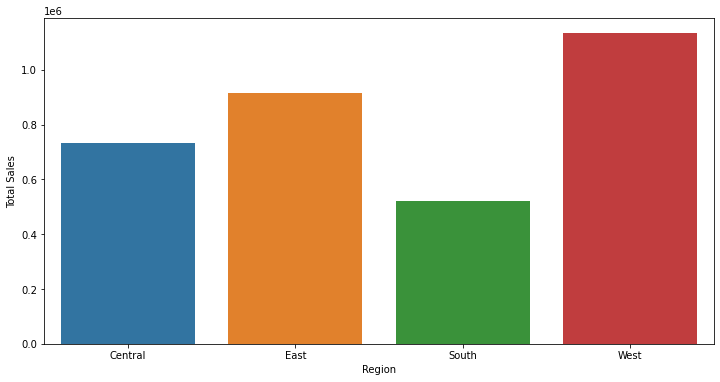

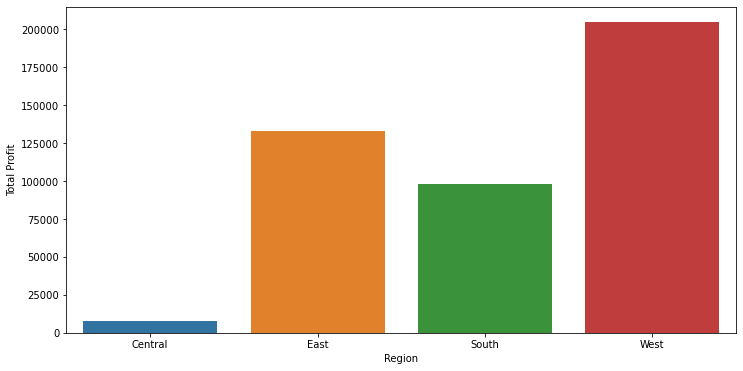

In [56]:
#Regional Sales and Profitability:
#Sales and Profit by Region
region_summ = df_cleaned.groupby('Region').agg({'Total Profit' : 'sum', 'Total Sales' : 'sum'}).reset_index()
region_summ

plt.figure(figsize=(12,6))
sns.barplot(data = region_summ, x = 'Region', y = 'Total Sales', label = 'Sales' )

plt.figure(figsize=(12,6))
sns.barplot(data = region_summ, x = 'Region', y = 'Total Profit', label = 'Profit' )

In [57]:
#State-wise Profitability:
state_profit = df_cleaned.pivot_table(index = 'State', values = 'Total Profit', aggfunc ='sum')
state_profit = state_profit.sort_values(by = 'Total Profit', ascending = False)
top_profit_state = state_profit.head(5)
bottom_profit_state = state_profit.tail(5)
top_profit_state
bottom_profit_state

,Total Profit
State,
California,161978.6590
New York,86530.8277
Washington,31937.6447
Michigan,30904.3769
Georgia,24947.0466


,Total Profit
State,
Arizona,-6935.4546
Ohio,-13844.5565
Pennsylvania,-18175.7245
Illinois,-36442.5987
Texas,-43384.1481


,State_encoded,Total Profit
State_encoded,1.000000,-0.068441
Total Profit,-0.068441,1.000000


<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation between Encoded State and Total Profit')

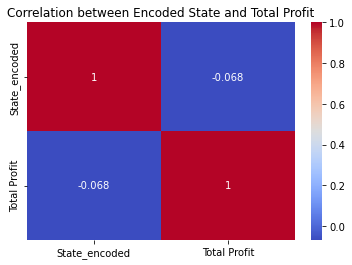

In [58]:
#Correlation between State and Profit:
#To perform correlation, 
#we first convert categorical data into numerical values using something called Label Encoding from sklearn.preprocessing.
#It assigns a unique number to each unique category in the "State" column.
from sklearn.preprocessing import LabelEncoder

# Step 1: Make a copy of your dataset to avoid changing the original
df_encoded = df_cleaned.copy()
# Step 2: Create a LabelEncoder object
le = LabelEncoder()
# Step 3: Encode the 'State' column to numeric values
df_encoded['State_encoded'] = le.fit_transform(df_encoded['State'])
# Step 4: Calculate correlation between the new column and Total Profit
correlation = df_encoded[['State_encoded', 'Total Profit']].corr()
correlation
# Step 5: Plot the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Encoded State and Total Profit')
plt.show()

#-0.068 is very close to 0, which means:
#There is very little to no linear correlation between the state and the total profit.
#In simple terms: Profitability does not consistently increase or decrease with different states (based on their encoded number).

Text(0.5, 1.0, 'Impact of Discount on Total Profit')

Text(0.5, 20.80000000000002, 'Discount')

Text(-3.4499999999999886, 0.5, 'Total Profit')

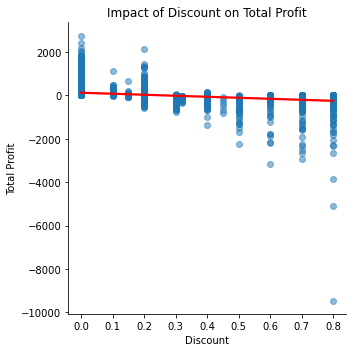

In [59]:
# Scatter plot with regression line
#1. Impact of Discounts on Profitability

sns.lmplot(data=df_cleaned, x='Discount', y='Total Profit', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title("Impact of Discount on Total Profit")
plt.xlabel("Discount")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

,Sub-Category,Original Price,Sales Price
6,Copiers,549.980833,444.984500
11,Machines,474.255800,249.306340
16,Tables,387.421040,259.173685
4,Bookcases,336.496788,245.775951
5,Chairs,295.025538,238.270428
13,Phones,210.568336,173.174577
1,Appliances,154.425927,113.974885
14,Storage,146.088054,134.525506
0,Accessories,144.098640,131.763008
9,Furnishings,90.916263,75.121114


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Sub-Category', ylabel='Original Price'>

<AxesSubplot:xlabel='Sub-Category', ylabel='Original Price'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

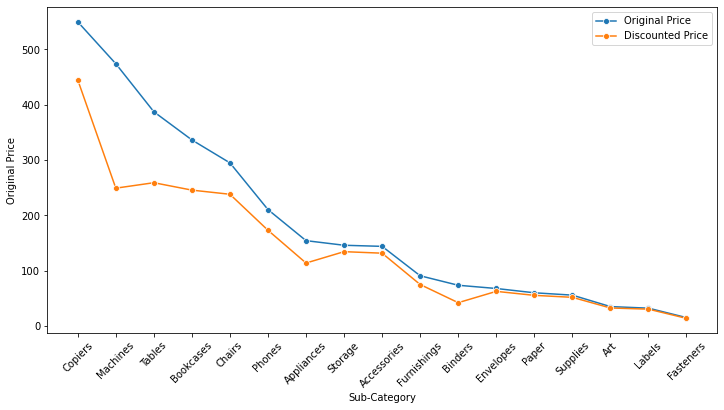

In [64]:
#2. Original Price vs. Discounted Price (Line Plot by Sub-Category)
price_df = df_cleaned.groupby('Sub-Category')[['Original Price', 'Sales Price']].mean().reset_index()
price_df = price_df.sort_values(by='Original Price', ascending=False)
price_df
plt.figure(figsize = (12,6))
sns.lineplot(data = price_df, x ='Sub-Category', y = 'Original Price', label = 'Original Price', marker = 'o')
sns.lineplot(data = price_df, x ='Sub-Category', y = 'Sales Price', label = 'Discounted Price', marker = 'o')
plt.xticks(rotation= 45)

,Category,Original Price,Sales Price
0,Furniture,194.555157,149.865598
2,Technology,190.063649,157.854425
1,Office Supplies,74.204937,59.976424


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Category', ylabel='Original Price'>

<AxesSubplot:xlabel='Category', ylabel='Original Price'>

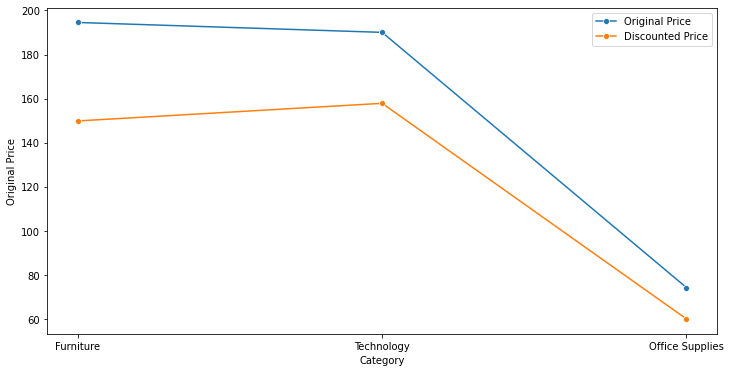

In [69]:
#2. Original Price vs. Discounted Price (Line Plot by Category)
price_df_cat = df_cleaned.groupby('Category')[['Original Price','Sales Price']].mean().reset_index()
price_df_cat = price_df_cat.sort_values(by = 'Original Price', ascending = False)
price_df_cat
plt.figure(figsize = (12,6))
sns.lineplot(data = price_df_cat, x = 'Category', y = 'Original Price', label = 'Original Price', marker = 'o')
sns.lineplot(data = price_df_cat, x = 'Category', y = 'Sales Price', label = 'Discounted Price', marker = 'o')

<Figure size 1008x432 with 0 Axes>

<AxesSubplot:xlabel='YearMonth', ylabel='Total Sales'>

<AxesSubplot:xlabel='YearMonth', ylabel='Total Sales'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

Text(0.5, 1.0, 'Monthly Sales and Profit Trends Over Time')

Text(0, 0.5, 'Amount')

Text(0.5, 0, 'Year-Month')

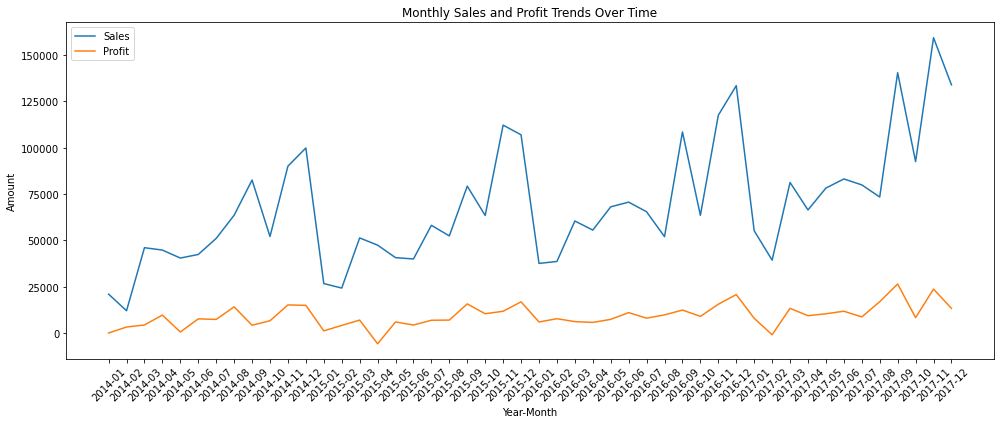

In [71]:
#Sales and Profit Trends Over Time:
# Create year-month column
df_cleaned['YearMonth'] = df_cleaned['Order Date'].dt.to_period('M').astype(str)

# Group by YearMonth
monthly_trends = df_cleaned.groupby('YearMonth')[['Total Sales', 'Total Profit']].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trends, x='YearMonth', y='Total Sales', label='Sales')
sns.lineplot(data=monthly_trends, x='YearMonth', y='Total Profit', label='Profit')
plt.xticks(rotation=45)
plt.title('Monthly Sales and Profit Trends Over Time')
plt.ylabel('Amount')
plt.xlabel('Year-Month')
plt.legend()
plt.tight_layout()
plt.show()

In [73]:
#Order Frequency by Month
df_cleaned['Order ID'].nunique()

4725

,OrderMonth,count_of_order
0,1,169
1,2,156
2,3,339
3,4,325
4,5,350
5,6,339
6,7,322
7,8,321
8,9,655
9,10,389


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='OrderMonth', ylabel='count_of_order'>

([<matplotlib.axis.XTick at 0x1ffe8d60220>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

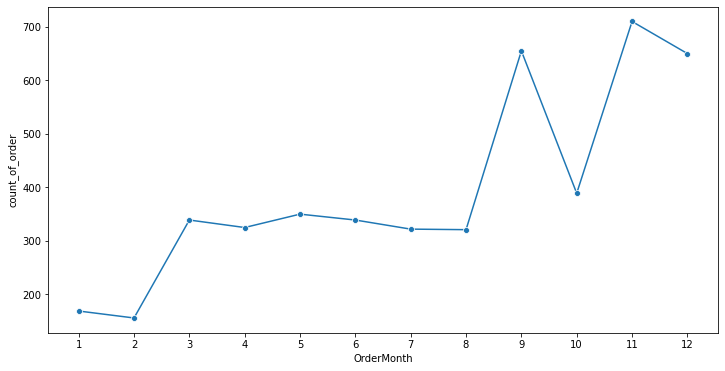

In [80]:
df_cleaned['OrderMonth'] = df_cleaned['Order Date'].dt.month 
monthly_order = df_cleaned.groupby('OrderMonth').agg(count_of_order = ('Order ID','nunique')).reset_index()
monthly_order

plt.figure(figsize = (12,6))
sns.lineplot(data = monthly_order, x = 'OrderMonth', y = 'count_of_order', marker = 'o')
plt.xticks(ticks = range(1,13))

,year,Total Sales,Total Profit
0,2014,6.461571e+05,88356.4893
1,2015,7.030296e+05,85763.0170
2,2016,8.716515e+05,119923.9525
3,2017,1.083406e+06,149669.4390


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='year', ylabel='Total Sales'>

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='year', ylabel='Total Profit'>

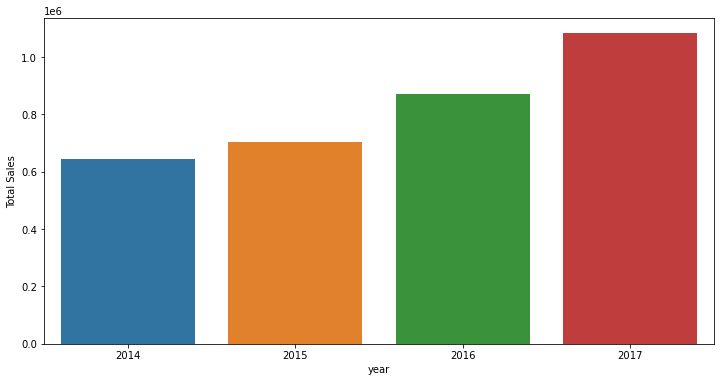

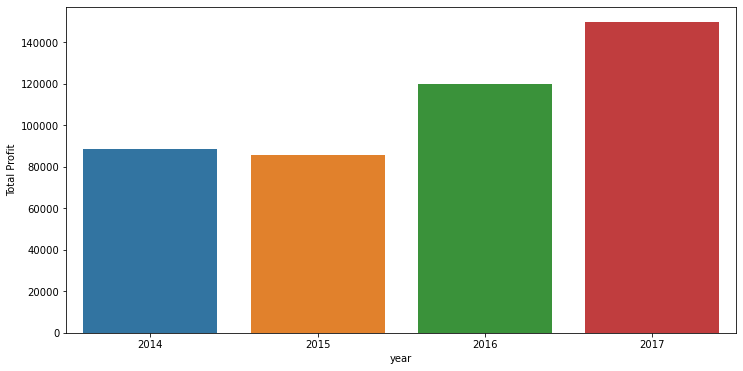

In [94]:
#Yearly Growth in Sales and Profit
df_cleaned['year'] = df_cleaned['Order Date'].dt.year
year_summ = df_cleaned.groupby('year')[['Total Sales','Total Profit']].sum().reset_index()
year_summ
plt.figure(figsize =(12,6))
sns.barplot(data = year_summ, x = 'year', y = 'Total Sales')

plt.figure(figsize =(12,6))
sns.barplot(data = year_summ, x = 'year', y = 'Total Profit')